In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Consider below a curve for Cost Function vs m or b (Only for understanding)
<img src="download.png">

### GRADIENT DESCENT
Here we do not differentiate and find value of m and b as in the last case because as the number of features 
(x1,x2,x3....xn) increases, finding the value of m and b becomes complex.
<br>So in gradient descent we try to each the minimum value of the cost function by descending below
<br>In the above graph we are considering <br>**CF=(summation((yActual-(mx+b)^2))/N
<br>Here m and b constitutes weights. So in linearRegression for the equation of n variables we have n+1 weights
<br>The Process works as:
1. Finding the gradient or the slope of at the given m and b, to know the slope,more is the slope more fall we can       achieve without Overshooting.
2. Finding the value of new m and b using:
    <br>**new_m = m_current -(learningRate\*m_gradient)**
    <br>**new_b = b_current -(learningRate\*b_gradient)**
    <br>learning rate is the step length to which we have to fall
3. For new m and b,we do the same thing again for a num of iterations to reach the min value of cost function.

<br>Reaching the min value depends on two factors:
1. Number of iterations
2. Value of cost function doesnt change much with iteration


In [73]:
#Finding the step gradient or del(E)/del(m) and del(E)/del(b) for finding new m and b
def step_gradient(b_current,m_current,points,learningRate):
    #taking initial values for m and b
    b_gradient=0
    m_gradient=0
    N=len(points)
    for i in range(0,N): #This for loop is for the submission sign present in the formula
        x=points[i,0]
        y=points[i,1]
        b_gradient += -(2/N)*(y-(m_current*x+b_current))
        m_gradient += -(2/N)*(y-(m_current*x+b_current))*x
    new_m = m_current -(learningRate*m_gradient)
    new_b = b_current -(learningRate*b_gradient)
    return [new_b,new_m]


In [74]:
# Finding the predicted values for x test that is y predict
def predict(x,b,m):
    y_pred=m*x+b
    return y_pred

In [118]:
#Here finding m and b for a number of iterations and descending the graph
def gradient_descent_runner(points,starting_b,starting_m,learningRate,num_iterations):
    #points= np.genfromtxt("data.csv",delimiter=",")#points is a 2 d array with x and y
    b=starting_b
    m=starting_m
    #making 2 1D array from slicing,required for plotiing later
    y_initial=points[:,1]
    x_initial=points[:,0]
    costList = [] #For storing cost at a given iteration
    costMList = [] #For storing the ith iteration with the corresponding cost for plotting
    for i in range(num_iterations):
        b,m=step_gradient(b,m,points,learningRate)
#The if block is for showing the two plots, One is line of fit plot and another is costfunction plot changing with iterations
        if i%2==0:
            y_pred=predict(x_initial,b,m)
            costList.append (cost_function(m , b, points))
            costMList.append (m)
            plt.scatter(x_initial,y_initial)
            plt.plot(x_initial,y_pred)
            plt.show()
    print("Plot for cost function vs m")
    plt.scatter(costMList , costList)
    plt.plot(costMList , costList)
    plt.show()
    return [m,b]    

In [119]:
def cost_function(m,b,points):
    totalCost=0
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1]
        totalCost +=(y-(m*x+b))**2
    return totalCost/len(points)    

In [120]:
def run(points):
    learningRate=0.0001
    initial_b=0
    initial_m=0
    num_iterations=10
    print("Initial cost Function " , cost_function(initial_m,initial_b,points))
    final_m,final_b=gradient_descent_runner(points,initial_b,initial_m,learningRate,num_iterations)
    print ("Minimized cost function" , cost_function(final_m,final_b,points))
    return final_b,final_m #returning as have to use to calculate Ypredict

Initial cost Function  5565.10783448


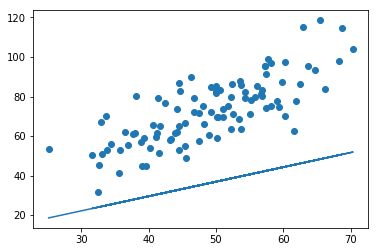

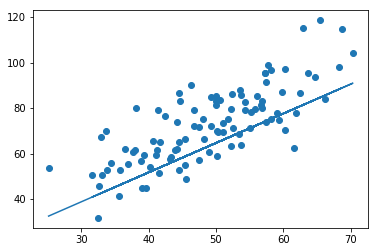

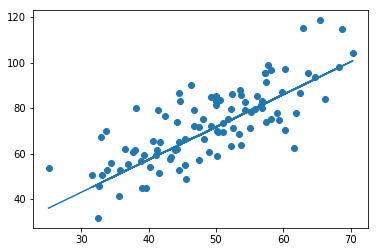

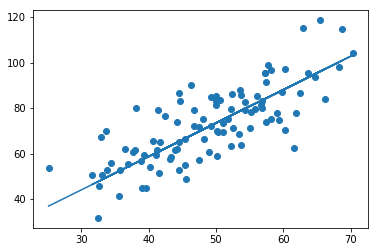

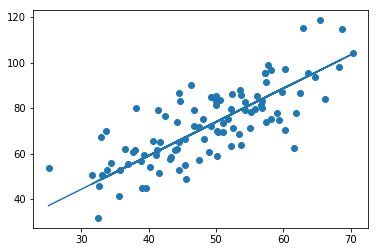

Plot for cost function vs m


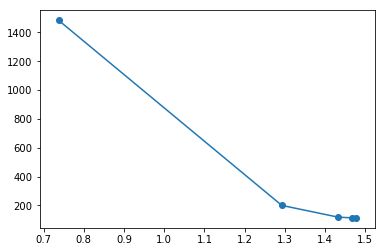

Minimized cost function 112.655851815
final_m 1.47741737555 final_ b 0.0296393478747


In [121]:
points= np.genfromtxt("data.csv",delimiter=",")
b , m = run(points)
print("final_m" , m , "final_ b" , b)

### Compare the values of m and b of inbuilt Linear Regression and Linear Regrssion implemented by us (for one column of iris as x and iris.target as y)

In [122]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [123]:
iris= datasets.load_iris()

In [124]:
type(iris.data)

numpy.ndarray

In [166]:
x = iris.data[0: , 0:1]

In [167]:
y = iris.target

In [168]:
X_Train,X_Test,Y_Train,Y_Test= cv.train_test_split(x,y,test_size=0.2)

In [169]:
clf=LinearRegression()

In [170]:
clf.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
Y_pred=clf.predict(X_Test).astype(int) 
#.astype(int) is required as Ypred by default has tha type float and Y-Test is an int type
#Y_Test
print(" m - " , clf.coef_)
print(" b - " , clf.intercept_)

 m -  [ 0.81509486]
 b -  -3.79398415773


Initial cost Function  1.66666666667


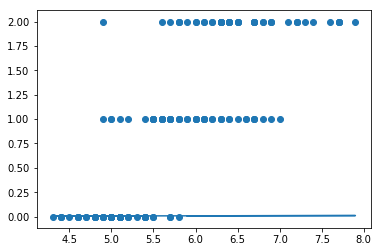

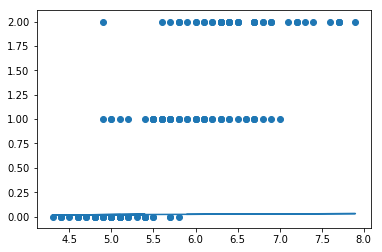

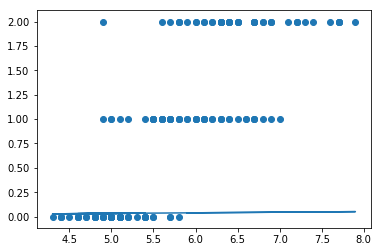

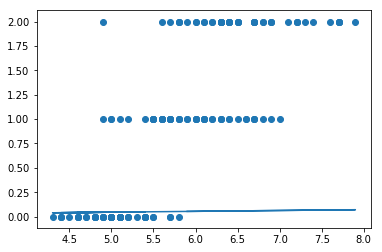

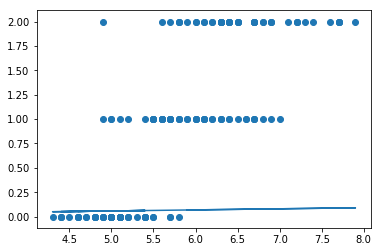

Plot for cost function vs m


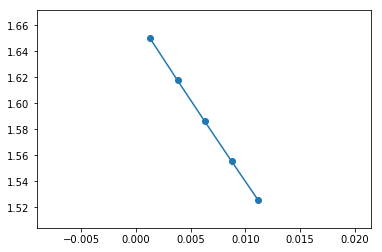

Minimized cost function 1.51116873339
final_m 0.0123391924394 final_ b 0.00193249103747


In [174]:
#Creating a points numpy array for our fit function by combining x and y
x = iris.data[0:, 0:1]
#print(x)
#x = x.ravel() #converting n d array to 1 d array
y = y.astype(float)
#print(y.shape)
y = y.reshape((150,1))
#print(y)
points = np.concatenate((x,y), axis =1)
points[0:10]
b , m = run(points)
print("final_m" , m , "final_ b" , b)

In [173]:
confusion_matrix(Y_pred,Y_Test) 

array([[9, 6, 3],
       [0, 3, 5],
       [0, 0, 4]])

### Confusion Matrix
<img src="confusion_matrix.png">

In [159]:
print(classification_report(Y_Test,Y_pred))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78         7
          1       0.57      0.67      0.62        12
          2       1.00      0.45      0.62        11

avg / total       0.74      0.67      0.66        30



Better appraoch than above used approach:
1. Stochastic Gradient Descent- Learning Rate Changes According to Change in the value of th cost function
   Means that as we are oing down the curve the step jumped is also decreasing
   In the above code update:
2. MINI-BATCH GRADIENT DESCENT (MB-GD)
3. ADAM OPTIMISER

<br>Confusion Matrix for C1 C2 C3..Cn classifer
<br>     C1 C2 C3 C4
 <br>  C1
<br>   C2
<br>   C3
 <br>  C4
<br>For every classifier,calculate the result against a confusion matrix to check the accuracy
<br>A few terms to be noted:
<br>Accuracy= (TP+TN)/Total
<br>Sensitivity=TP/Positives
<br>Specificity=TN/Negatives
<br>Precision= True Positives/Total positives told by classifier
         =TP/(TP+FP)
<br>Recall= TP/(TP+FN)
<br>TP=True Positives
<br>FN=False Negatives
<br>FP=False positives
<br>TN=True Negatives


Three Methods for dividing the data for testing and training purposes
1. HoldOut(Fastest)=Keeping a part of data randomly with ourselves and traning the machine with tha rest of the data
2. Cross Validation= (K parameter) The data set is divided into k **exclusive** parts and keeping a part say D1 for testing and traning the machine on the rest of the data. Then keeping D2  for testing and training with the rest.
<br>This is the practical approach as all the data gets tested over the machine.
<br>The final score for training and testing is the mean of all the scores of the loop
3. BootStrap= In this methods k stes are made but they arent mutually exclusive

#### READ ABOUT
1. Strasified Cross Validation
2. Hold one out
3. Classification Model 
4. Regression Model

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
#iris dataset is classification model and hence applying SVC 

In [49]:
clf=SVC()
clfR=LinearRegression()

In [50]:
score=cross_val_score(clfR,iris.data,iris.target,cv=5)
score.mean()

0.32288342759973732

In [51]:
scores=cross_val_score(clf,iris.data,iris.target,cv=5)


In [52]:
scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

In [53]:
scores.mean()

0.98000000000000009

In [54]:
#Plotting the curve?????

### For colouring the graph with different colors

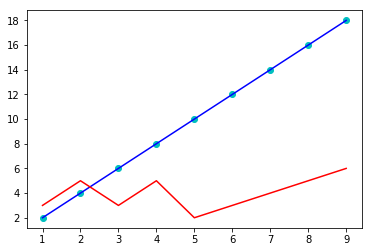

In [5]:
x=[1,2,3,4,5,6,7,8,9]
y1=[2,4,6,8,10,12,14,16,18]
y2 = [3,5,3,5,2,3,4,5,6]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.scatter(x,y1,color=random.choice(colors))
plt.plot(x,y1,color=random.choice(colors))
plt.plot(x,y2,color=random.choice(colors))
plt.show()


### Compare m and b values like above for Diabetes dataset as done for Iris datset

In [ ]:
#Writing a step gradient fucntion for n features(m1, m2 , m3, ......mn)

In [175]:
 def step_gradient(m_current,points,learningRate):
    #taking initial values for m and b
    m = np.array([0 for i in range(0,4)])
    N=len(points)
    for i in range(0,N): #This for loop is for the submission sign present in the formula
        x=points[i,0:4]
        y=points[i,4]
        for j in range(0,4):
            s += m[j]*x[j]
        for j in range(0,4):
            m[j] += -(2/N)*(y-s)*x[i][j]
    new_m = m_current -(learningRate*m)
    return new_m

In [176]:
def predict(x,m):
    y_pred = np.array([])
    for i in range(len(x)):
        for j in range(len(m)):
            y_pred[i] += m[i][j]*x[i][j]
    return y_pred

In [ ]:
def gradient_descent_runner(points,starting_m,learningRate,num_iterations):
    m=starting_m
    costList = [] #For storing cost at a given iteration
    costMList = [] #For storing the ith iteration with the corresponding cost for plotting
    for i in range(num_iterations):
        b,m=step_gradient(b,m,points,learningRate)
#The if block is for showing the plot,costfunction plot changing with m
        if i%2==0:
            y_pred=predict(x_initial,b,m)
            costList.append (cost_function(m , b, points))
            costMList.append (m)
            plt.scatter(x_initial,y_initial)
            plt.plot(x_initial,y_pred)
            plt.show()
    print("Plot for cost function vs m")
    plt.scatter(costMList , costList)
    plt.plot(costMList , costList)
    plt.show()
    return [m,b]    